In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
def get_stats_df(G):

    # get degree info
    node_in_degrees = dict(G.in_degree(weight="weight"))
    in_degree_list = list(node_in_degrees.values())
    surfer_list = list(node_in_degrees.keys())

    # create df
    df = pd.DataFrame({"surfer": surfer_list, "in-degree": in_degree_list})
    df = df.sort_values(by="in-degree", ascending=False)
    df.reset_index(inplace=True, drop=True)

    # add number of events info
    events_col = []
    for name in df["surfer"]:
        events_col.append(G.nodes[name]["events"])
    df["events"] = events_col

    return df

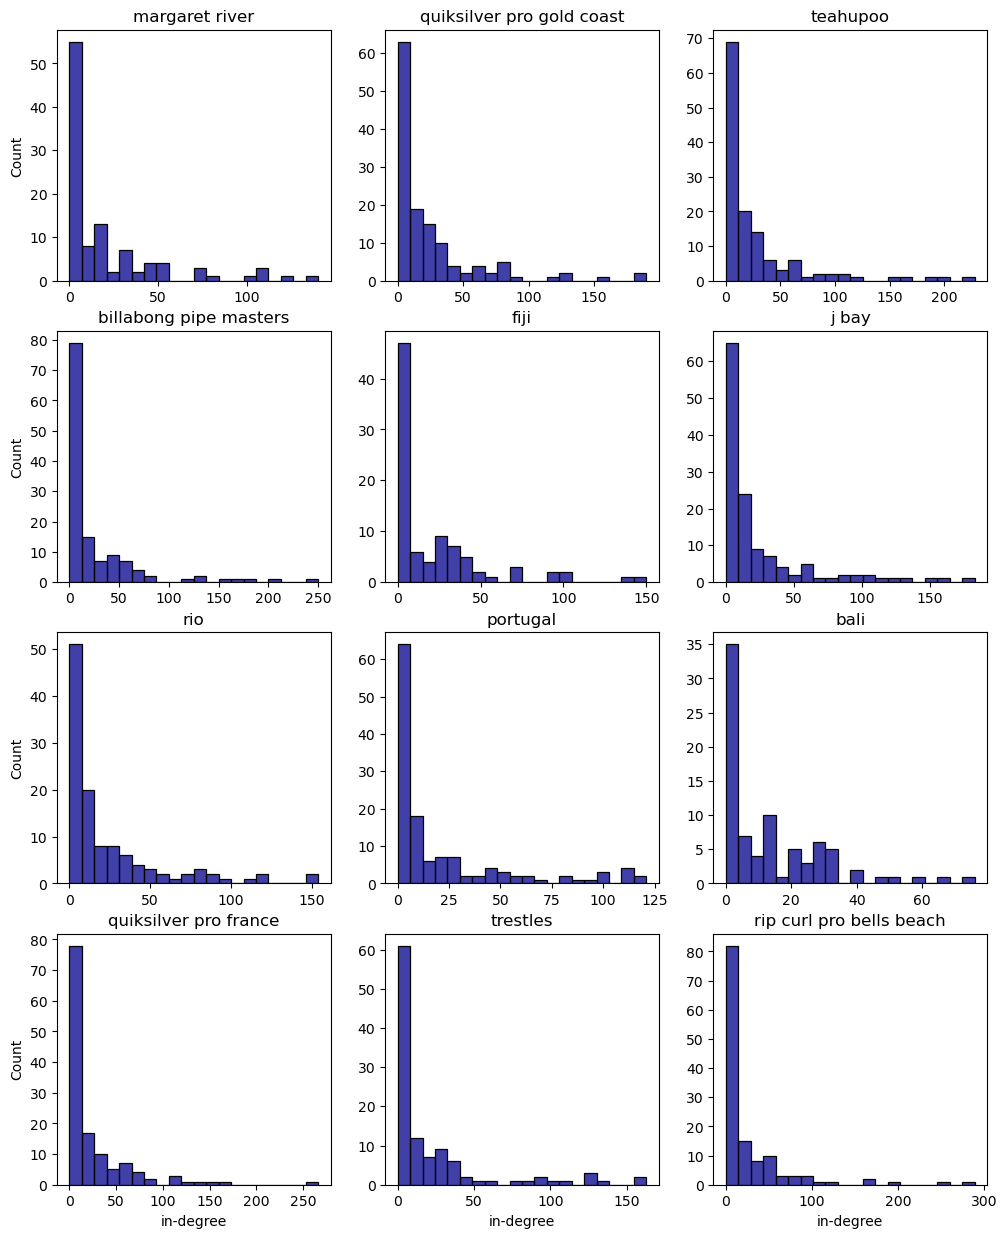

In [35]:
network_files = os.listdir("../data/networks")

fig, axes = plt.subplots(4, 3, figsize=(12,15))

i = 0; j = 0
for file in network_files:

    if file == "overall_results_network.gml":
        continue

    # get network
    net = nx.read_gml(f"../data/networks/{file}")
    event_name = file.split("_network")[0]

    # get dataframe
    df = get_stats_df(net)

    # make plot
    sns.histplot(df["in-degree"], bins=20, color="darkblue", ax=axes[i,j])

    # set axis labels
    if j != 0:
        axes[i,j].set_ylabel("")
    if i != 3:
        axes[i,j].set_xlabel("")

    # set title
    axes[i,j].set_title(event_name.replace("_results", "").replace("-"," "))

    # incremement visual
    j += 1
    if j%3 == 0:
        j = 0
        i += 1

plt.show()